<a href="https://colab.research.google.com/github/BismiMariya/ML-Projects/blob/main/knn_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,NaN,168.0,0,1.0,2,2.0,3.0,0
1,53,1,0,140.0,203,1,0.0,155.0,1,3.1,0,0.0,3.0,0
2,70,1,0,145.0,174,0,1.0,125.0,1,2.6,0,0.0,3.0,0
3,61,1,0,148.0,203,0,1.0,NaN,0,0.0,2,1.0,3.0,0
4,62,0,0,138.0,294,1,1.0,106.0,0,1.9,1,3.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221,0,1.0,164.0,1,0.0,2,0.0,2.0,1
1021,60,1,0,125.0,258,0,0.0,141.0,1,2.8,1,1.0,3.0,0
1022,47,1,0,110.0,275,0,0.0,118.0,1,1.0,1,1.0,2.0,0
1023,50,0,0,110.0,254,0,0.0,159.0,0,0.0,2,0.0,2.0,1


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,NaN,168.0,0,1.0,2,2.0,3.0,0
1,53,1,0,140.0,203,1,0.0,155.0,1,3.1,0,0.0,3.0,0
2,70,1,0,145.0,174,0,1.0,125.0,1,2.6,0,0.0,3.0,0
3,61,1,0,148.0,203,0,1.0,NaN,0,0.0,2,1.0,3.0,0
4,62,0,0,138.0,294,1,1.0,106.0,0,1.9,1,3.0,2.0,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140.0,221,0,1.0,164.0,1,0.0,2,0.0,2.0,1
1021,60,1,0,125.0,258,0,0.0,141.0,1,2.8,1,1.0,3.0,0
1022,47,1,0,110.0,275,0,0.0,118.0,1,1.0,1,1.0,2.0,0
1023,50,0,0,110.0,254,0,0.0,159.0,0,0.0,2,0.0,2.0,1
1024,54,1,0,120.0,188,0,1.0,113.0,0,1.4,1,1.0,3.0,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,float64
chol,int64
fbs,int64
restecg,float64
thalach,float64
exang,int64
oldpeak,float64


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.ndim

2

In [ ]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,1
chol,0
fbs,0
restecg,1
thalach,1
exang,0
oldpeak,0


In [ ]:
# missing values filling
df['trestbps']=df['trestbps'].fillna(df['trestbps'].mean())
df['restecg']=df['restecg'].fillna(df['restecg'].mode()[0])
df['thalach']=df['thalach'].fillna(df['thalach'].mean())
df['ca']=df['ca'].fillna(df['ca'].mode()[0])
df['thal']=df['thal'].fillna(df['thal'].mode()[0])
df.isna().sum()




,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
x=df.iloc[:,:-1].values

In [ ]:
x

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [ ]:
x.ndim

2

In [ ]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
y.ndim

1

In [ ]:
# Training data and Testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
x_train

array([[57.,  1.,  2., ...,  2.,  0.,  2.],
       [59.,  1.,  0., ...,  1.,  2.,  1.],
       [71.,  0.,  0., ...,  1.,  0.,  2.],
       ...,
       [65.,  1.,  3., ...,  1.,  1.,  2.],
       [67.,  1.,  0., ...,  1.,  0.,  2.],
       [60.,  1.,  2., ...,  1.,  0.,  2.]])

In [ ]:
x_test

array([[44.,  1.,  2., ...,  2.,  0.,  2.],
       [58.,  0.,  1., ...,  2.,  2.,  2.],
       [63.,  1.,  0., ...,  2.,  2.,  3.],
       ...,
       [56.,  1.,  2., ...,  1.,  1.,  1.],
       [57.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [ ]:
x_train

array([[57.,  1.,  2., ...,  2.,  0.,  2.],
       [59.,  1.,  0., ...,  1.,  2.,  1.],
       [71.,  0.,  0., ...,  1.,  0.,  2.],
       ...,
       [65.,  1.,  3., ...,  1.,  1.,  2.],
       [67.,  1.,  0., ...,  1.,  0.,  2.],
       [60.,  1.,  2., ...,  1.,  0.,  2.]])

In [ ]:
y_test

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [ ]:
y_train

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [ ]:
# Normalization : to set  all input  values in same range.

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #object creation
scaler.fit(x_train)  #to collect training data
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
x_train

array([[ 0.27717522,  0.65226323,  1.02564169, ...,  0.9790949 ,
        -0.73603133, -0.51108759],
       [ 0.49897726,  0.65226323, -0.91725155, ..., -0.66111782,
         1.21132832, -2.12540389],
       [ 1.82978951, -1.53312338, -0.91725155, ..., -0.66111782,
        -0.73603133, -0.51108759],
       ...,
       [ 1.16438338,  0.65226323,  1.99708831, ..., -0.66111782,
         0.23764849, -0.51108759],
       [ 1.38618543,  0.65226323, -0.91725155, ..., -0.66111782,
        -0.73603133, -0.51108759],
       [ 0.60987828,  0.65226323,  1.02564169, ..., -0.66111782,
        -0.73603133, -0.51108759]])

In [ ]:
x_test

array([[-1.16453806,  0.65226323,  1.02564169, ...,  0.9790949 ,
        -0.73603133, -0.51108759],
       [ 0.38807624, -1.53312338,  0.05419507, ...,  0.9790949 ,
         1.21132832, -0.51108759],
       [ 0.94258134,  0.65226323, -0.91725155, ...,  0.9790949 ,
         1.21132832,  1.10322872],
       ...,
       [ 0.16627419,  0.65226323,  1.02564169, ..., -0.66111782,
         0.23764849, -2.12540389],
       [ 0.27717522, -1.53312338, -0.91725155, ...,  0.9790949 ,
        -0.73603133, -0.51108759],
       [-0.05552785,  0.65226323, -0.91725155, ..., -0.66111782,
         0.23764849,  1.10322872]])

In [ ]:
# Model creation
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7) #k=7
model.fit(x_train,y_train)
y_pred=model.predict(x_test) #machine predicting data
y_pred #this is the machine predicted value

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,

In [ ]:
y_test

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [ ]:
data=scaler.transform([[75,1,0,147.0,154,0,1.0,150.0,1,3.6,0,0.0,4.0]])
print(model.predict(data))

[0]


In [ ]:
# Performance evaluation : find confusion matrics,accuracy score
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred) #creating object for confusion metrics
cm

array([[122,  23],
       [ 16, 147]])

In [ ]:
score=accuracy_score(y_test,y_pred) #object for accuracy score
score

0.8733766233766234

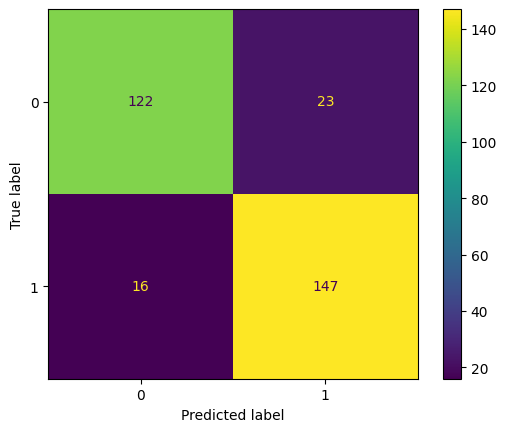

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
label=[0,1] #object for values
cmd=ConfusionMatrixDisplay(cm,display_labels=label) #object for confusionmatrics
cmd.plot()